# The Sparks Foundation - Data Science & Business Analytics Internship


## Task1 - Prediction using Supervised ML

A Linear Regression task to predict the percentage of a student based on the number of study hours per day.

DataSet Url: http://bit.ly/w-data

Batch: November 2021

## Author: Sai Teja Erukude

In [2]:
# importing the required libraries

import pandas as pd
import numpy as np  

import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# Reading data from remote link

url = 'http://bit.ly/w-data'
data = pd.read_csv(url)

print('Data imported!')
data.head()

Data imported!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# checking for the null values

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
# looking for the basic info of the data

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Plotting the data
Let's plot our data points on a 2D graph to eyeball our dataset and see if we can find any relationship between the variables.

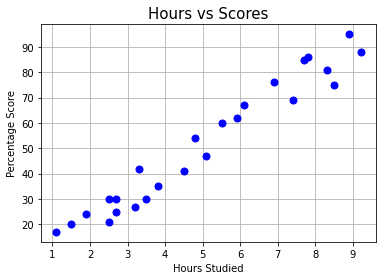

In [6]:
# Plotting the distribution of scores

plt.plot(data.Hours, data.Scores, 'bo', markersize=7)
plt.title('Hours vs Scores', fontsize=15)  
plt.xlabel('Hours Studied', fontsize=10)  
plt.ylabel('Percentage Score', fontsize=10)  
plt.grid()
plt.show()

**From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [7]:
hours = np.array(data.Hours).reshape(-1,1)
scores = np.array(data.Scores)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method

In [8]:
# Splitting the data into train data(80%) and test data(20%)

hours_train, hours_test, scores_train, scores_test = train_test_split(hours, scores, test_size=0.2, random_state=0)
print(hours_test)
print(scores_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[20 27 69 30 62]


### **Training the Algorithm**

It's time to create and train a Linear Regression model.

In [9]:
# Creating and training a linear regression model

reg = LinearRegression()
reg.fit(hours_train, scores_train)
print("Training completed!")

Training completed!


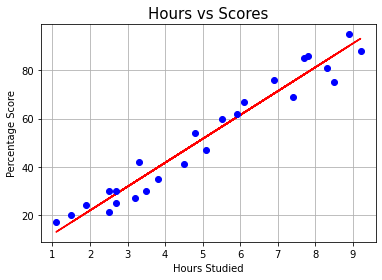

In [10]:
# Plotting the Regression line along with the data

line = reg.coef_*hours + reg.intercept_
plt.plot(hours, line, 'r')

plt.plot(hours, scores, 'bo')

plt.title('Hours vs Scores', fontsize=15)  
plt.xlabel('Hours Studied', fontsize=10)  
plt.ylabel('Percentage Score', fontsize=10)  
plt.grid()
plt.show()

### **Making Predictions**

Now that we have trained our algorithm, it's time to make some predictions.

In [11]:
# Predicting the percentage values for testing data

scores_pred = reg.predict(hours_test)

In [12]:
# Comparing the actual and predicted scores for test data

df = pd.DataFrame({
    'Hours': hours_test.flatten(),
    'Actual Scores': scores_test,
    'Predicted Scores': scores_pred
})  
df

,Hours,Actual Scores,Predicted Scores
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


### Q. What will be the predicted score if a student studies for <i>9.25</i> hrs/day?

In [13]:
# One can also test the model with their own data

own_hours = [[9.25]]
own_pred = reg.predict(own_hours)

print('No. of Hours studied = {}'.format(own_hours[0][0]))
print('Predicted Score = {}'.format(round(own_pred[0], 5)))

No. of Hours studied = 9.25
Predicted Score = 93.69173


### A. The score would be <u><i>93.69173</i></u> if studied for <i>9.25</i> hrs/day.

### **Evaluating the model**

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [14]:
# Evaluating the model using Mean Absolute Error and R^2 Score

print('Mean Absolute Error:', metrics.mean_absolute_error(scores_test, scores_pred))
print('R^2 Score:', metrics.r2_score(scores_test, scores_pred))

Mean Absolute Error: 4.183859899002982
R^2 Score: 0.9454906892105354


### Conclusion

Looking at the evaluation results we can concluse that the model has good Mean Absolute Error and R^2 score